In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])

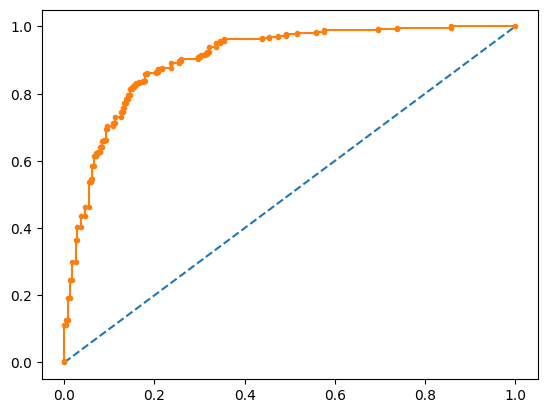

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
metrics.roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [ ]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_proba[:, 1])

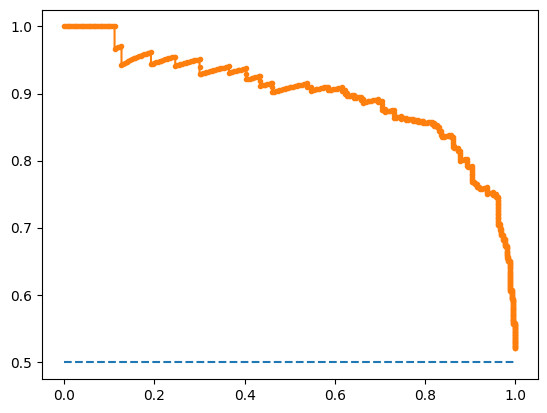

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
metrics.auc(recall, precision)

0.8977244980325834

# 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

Визуализация датасета


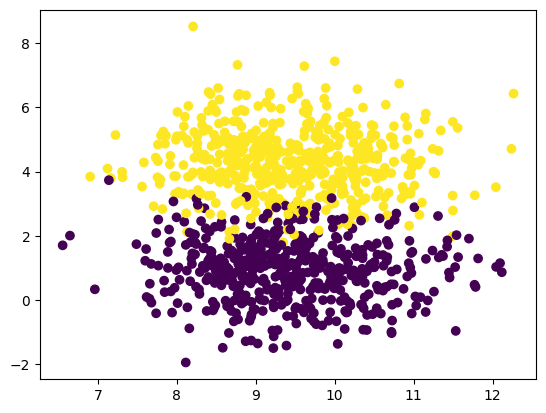

In [8]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2,
                  shuffle=True, random_state=4)
plt.scatter(X[:, 0], X[:, 1], c=y)
print("Визуализация датасета")
plt.show()

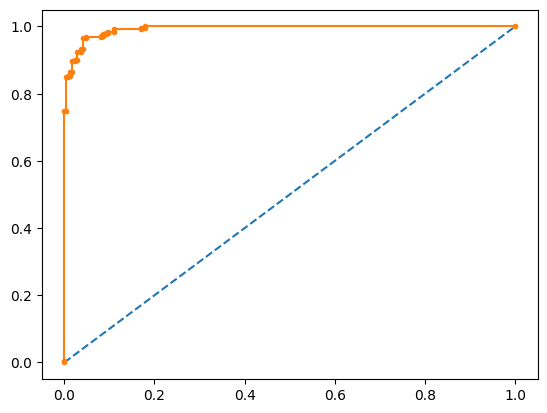

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [20]:
def draw_model(model, x, y, border = 0.5):
  X0 = np.linspace(x[:, 0].min()-1,x[:, 0].max()+1, x.shape[0])
  X1 = np.linspace(x[:, 1].min()-1,x[:, 1].max()+1, x.shape[0])
  X0_grid, X1_grid = np.meshgrid(X0, X1)

  y_predict = (model.predict_proba(np.c_[X0_grid.ravel(),X1_grid.ravel()])[:, 1] > border).astype('int').reshape(X0_grid.shape)
  # y_pred = (y_pred_proba[:, 1] > border).astype('int')
  plt.pcolormesh(X0_grid, X1_grid, y_predict)

  plt.scatter(x[:, 0], x[:, 1], c=y,  edgecolors='black',linewidth=1)

  plt.title('Визуализация разделяющих областей, \n полученных при помощи логистической регрессии')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()

Порог 0.5


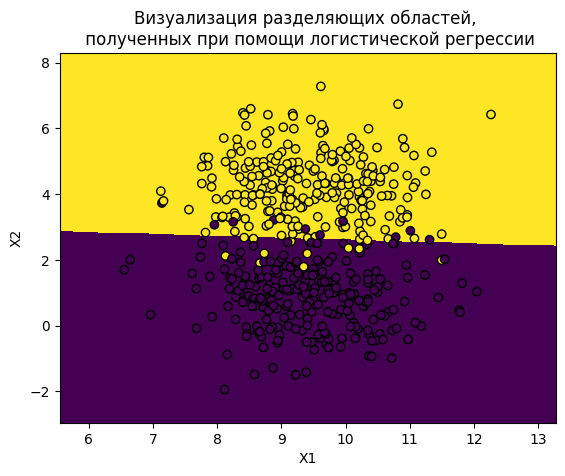

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       247
           1       0.96      0.95      0.96       253

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [21]:
print("Порог 0.5")
draw_model(model, X_test, y_test)
print(metrics.classification_report(y_test, model.predict(X_test)))

Порог 0.7


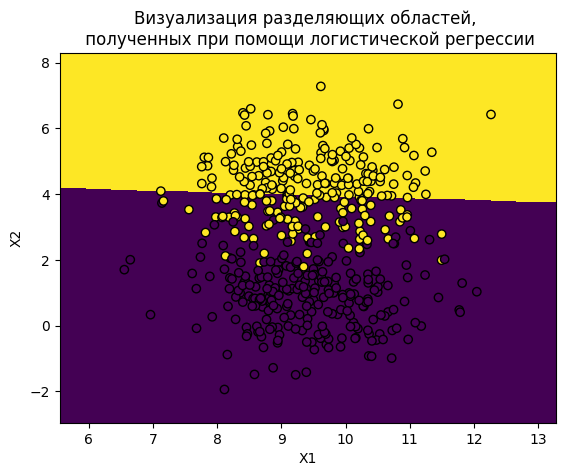

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       247
           1       1.00      0.60      0.75       253

    accuracy                           0.80       500
   macro avg       0.85      0.80      0.79       500
weighted avg       0.86      0.80      0.79       500



In [27]:
y_pred = (y_pred_proba[:, 1] > 0.99).astype('int')
print("Порог 0.99")
draw_model(model, X_test, y_test, 0.99)
print(metrics.classification_report(y_test, y_pred))

Порог 0.01


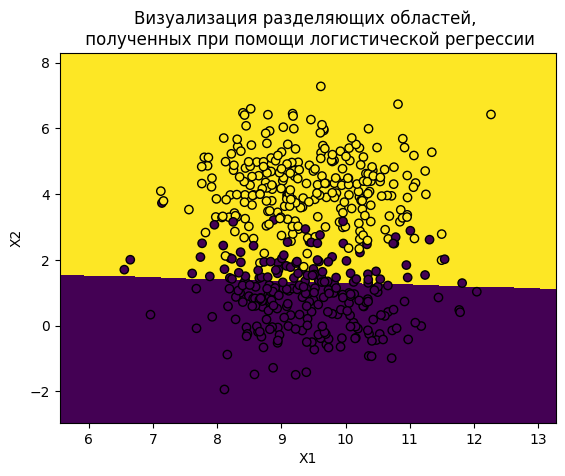

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       247
           1       0.75      1.00      0.85       253

    accuracy                           0.83       500
   macro avg       0.87      0.83      0.82       500
weighted avg       0.87      0.83      0.82       500



In [28]:
y_pred = (y_pred_proba[:, 1] > 0.01).astype('int')
print("Порог 0.01")
draw_model(model, X_test, y_test, 0.01)
print(metrics.classification_report(y_test, y_pred))

Вывод:

В данном задании были выведены результаты при разных порогах (0.5, 0.99, 0.01)

Были получены разные метрики эффективностимодели, при пороге 0.5 - точность 0.96

при 0.99 - 0.80, про 0.01 - 0.83

# 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.


In [56]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [57]:
data = load_breast_cancer()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
y = data.target
x = df.iloc[:,:]
y.shape, x.shape

((569,), (569, 30))

In [58]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


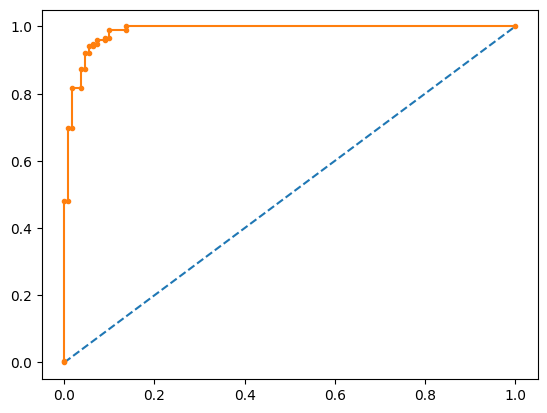

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.95      0.95      0.95       175

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)
model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
print(metrics.classification_report(y_test, model.predict(X_test)))

In [60]:
y_pred = (y_pred_proba[:, 1] > 0.01).astype('int')
print("Порог 0.01")
print(metrics.classification_report(y_test, y_pred))

Порог 0.01
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       110
           1       0.87      1.00      0.93       175

    accuracy                           0.91       285
   macro avg       0.94      0.88      0.90       285
weighted avg       0.92      0.91      0.91       285



In [61]:
y_pred = (y_pred_proba[:, 1] > 0.99).astype('int')
print("Порог 0.99")
print(metrics.classification_report(y_test, y_pred))

Порог 0.99
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       110
           1       0.98      0.73      0.84       175

    accuracy                           0.82       285
   macro avg       0.84      0.85      0.82       285
weighted avg       0.87      0.82      0.83       285



Вывод:

В данном датасете 1 - доброкачественное образование, 0 - злокачественное образование

Были выведены результаты можели при разных порогах принятия решения:

0.5 => точность = 0.94 (есть вероятность, что у некоторых больных злокачественна опухоль не будет обноружена)

0.01 => точность = 0.91 (все злокачественные опухоли будут найдены, но некоторым с доброкачественной скажу, что она злокачественная)

0.99 => точноть = 0.82 (найдут все доброкачественные, но некоторым с злокачественными опухолями скажут, что их опухоли доброкачественные)


# 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

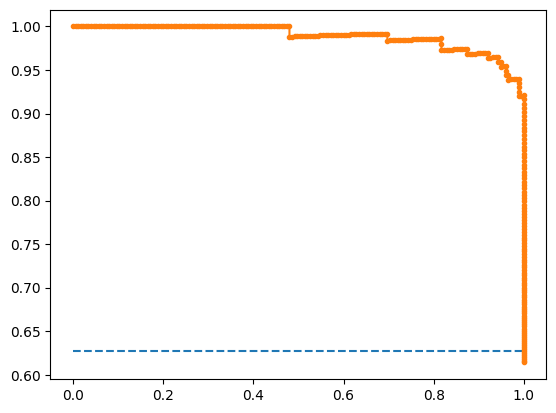

In [62]:
p, r, pr_thresholds = metrics.precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

Порог=0.211587, Средняя геом =0.964


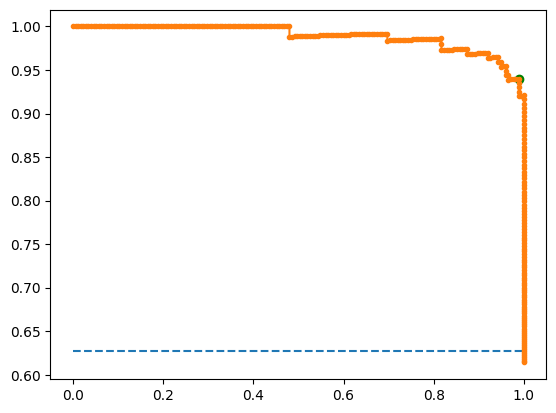

In [64]:
# оптимизируем по TPR и FPR
from numpy import argmax

geom = (p*r)**0.5
ix = argmax(geom)
print('Порог=%f, Средняя геом =%.3f' % (pr_thresholds[ix], geom[ix]))

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='green')
plt.show()

In [65]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print("Порог ", pr_thresholds[ix])
print(metrics.classification_report(y_test, y_pred))

Порог  0.21158653629613705
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       110
           1       0.94      0.98      0.96       175

    accuracy                           0.95       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.95      0.95      0.95       285



Вывод:

Точность стала выше на 0.01, чем при пороге в 0.5

# 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

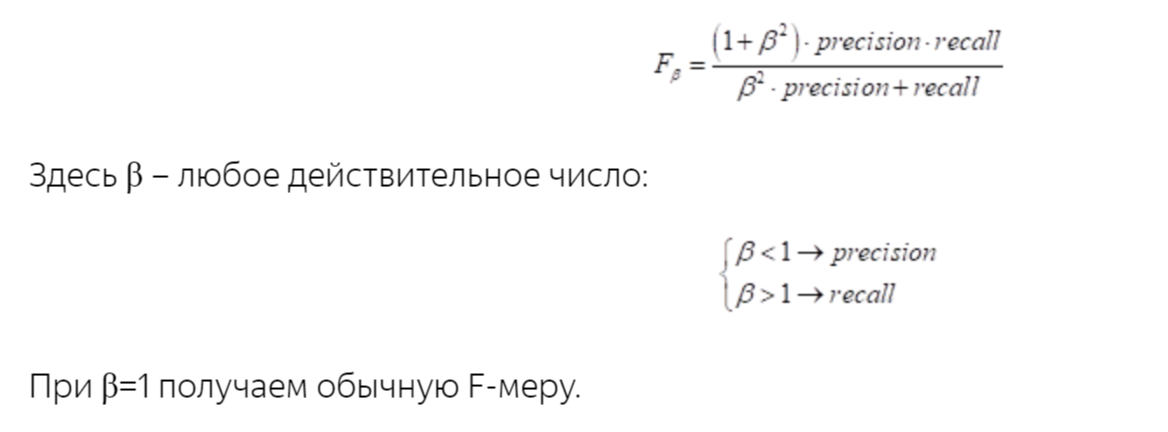

Порог=0.092369, F (преимущество по recall) =0.999 - на графике круг
Порог=0.999699, F (преимущество по precision) =0.482 - на графике крестик


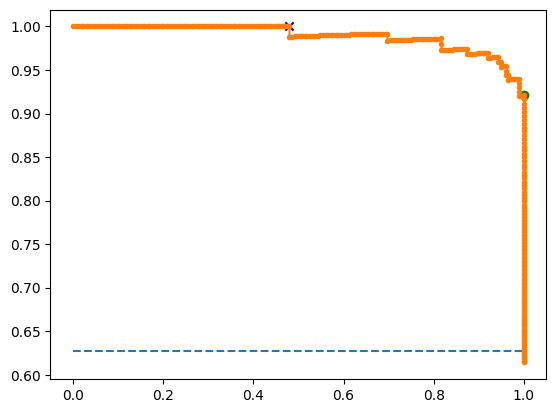

Порог  0.09236856941076532
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       110
           1       0.92      0.99      0.96       175

    accuracy                           0.94       285
   macro avg       0.96      0.93      0.94       285
weighted avg       0.95      0.94      0.94       285

Порог  0.9996986563484784
              precision    recall  f1-score   support

           0       0.54      1.00      0.71       110
           1       1.00      0.47      0.64       175

    accuracy                           0.68       285
   macro avg       0.77      0.74      0.67       285
weighted avg       0.82      0.68      0.67       285



In [72]:
F_recall = ((1+10**2)*p*r)/((10**2)*p+r)
F_pres = ((1+(0.01)**2)*p*r)/(((0.01)**2)*p+r)

ix = argmax(F_recall)
print('Порог=%f, F (преимущество по recall) =%.3f - на графике круг' % (pr_thresholds[ix], F_recall[ix]))

ix1 = argmax(F_pres)
print('Порог=%f, F (преимущество по precision) =%.3f - на графике крестик' % (pr_thresholds[ix1], F_recall[ix1]))

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='green')
plt.scatter(r[ix1], p[ix1], marker='x', color='blue')
plt.show()

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print("Порог ", pr_thresholds[ix])
print(metrics.classification_report(y_test, y_pred))

y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix1]).astype('int')
print("Порог ", pr_thresholds[ix1])
print(metrics.classification_report(y_test, y_pred))

Вывод:

Точность выше при оптимизации по precision

# 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

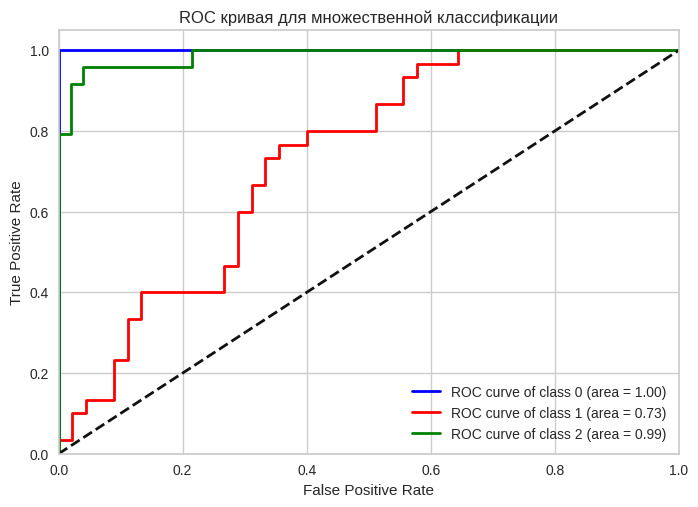

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Загрузка датасета Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# # Бинаризуем метки классов
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Обучение классификатора
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)

# Получение вероятностей принадлежности к классам
y_score = classifier.predict_proba(X_test)

# Построение ROC-кривых для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение графика ROC-кривых
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая для множественной классификации')
plt.legend(loc="lower right")
plt.show()

ROC позволяет оценить качество модели классификации для каждого класса в отдельности. Чем ближе кривая к верхнему левому углу, тем лучше качество классификации. Если кривая идеально прилегает к верхнему краю графика и затем вдоль оси FPR, то AUC = 1, что соответствует идеальной модели.

# 6. Используйте для построения кривых библиотеку yellowbrick.

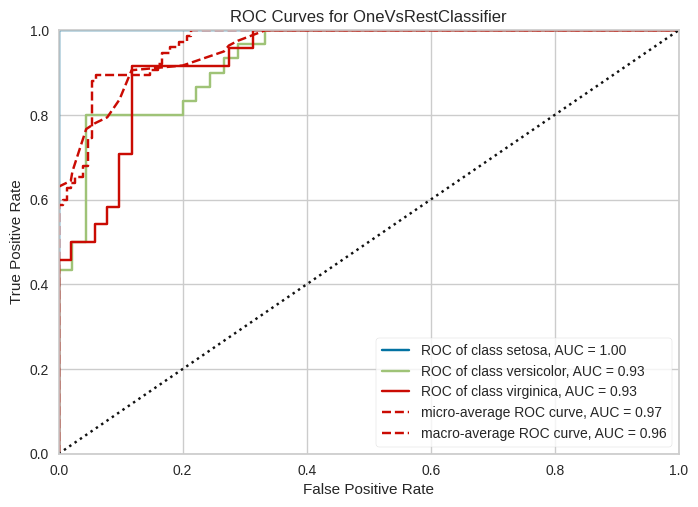

<Axes: title={'center': 'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [89]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC

# Загрузка датасета Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target


# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Обучение классификатора
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, y_train)


# Построение ROC-кривой
visualizer = ROCAUC(classifier, classes=data.target_names)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()